In [82]:
# %%script false --no-raise-error
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from IPython.display import Markdown
from IPython.display import display
from IPython.display import HTML
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

# show all rows/columns
pd.options.display.max_columns = None
# pd.options.display.max_rows = None
pd.set_option('display.float_format', lambda x: '%.1f' % x) #print float as int

def md(input):
    display(Markdown(input))

def step(input):
    return md(f"✅ *{input}*")

def get_corr_max(corr):
    return corr[corr < 1].apply(lambda x: (x.max(), x.idxmin())).sort_values(by = 0, axis = 1, ascending = False)

_df = pd.read_csv("ee654666-9d19-402e-9b80-5b70e4bcfe2d.csv", error_bad_lines=False, low_memory=False, nrows = None)
step("Importez la donnée.")

✅ *Importez la donnée.*

In [83]:
from tools import *
#le dataframe est copié pour le garder comme base de travail et on lui ajoute des méthodes à travers notre classe Table
df = _df.copy()

In [84]:
step("Affichez les 10 première lignes du jeux de données")
df.head(10)


✅ *Affichez les 10 première lignes du jeux de données*

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [85]:
step("Utilisez le .info()")
df.info();

✅ *Utilisez le .info()*

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [86]:
rows = df.shape[0]
step("Supprimez de façon automatique les variables avec plus de 30% de valeurs manquantes")
cols = [col for col in df if df[col].isna().sum() >= (0.3*rows)]
df.drop(cols, axis = 1)
print("colonnes supprimées: ",cols)
df.drop(cols, axis = 1)

✅ *Supprimez de façon automatique les variables avec plus de 30% de valeurs manquantes*

colonnes supprimées:  ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [87]:
step("Affichez avec un describe les informations de SalePrice")
df["SalePrice"].describe()

✅ *Affichez avec un describe les informations de SalePrice*

count     1460.0
mean    180921.2
std      79442.5
min      34900.0
25%     129975.0
50%     163000.0
75%     214000.0
max     755000.0
Name: SalePrice, dtype: float64

✅ *Affichez la distribution de SalePrice avec un distplot. Conclure sur la graphique: Que pouvez vous dire?*

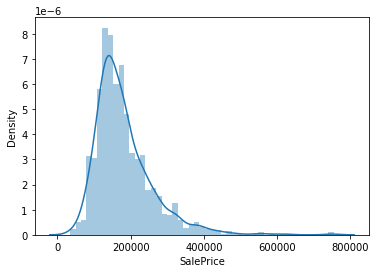

In [88]:
step("Affichez la distribution de SalePrice avec un distplot. Conclure sur la graphique: Que pouvez vous dire?")
ax = sns.distplot(df["SalePrice"])

La distribution n'est pas centrée, elle est asymétrique car la queue de distribution se situe à gauche. Ce qui signifie que la société peut vendre des biens jusqu'à 755 K€ que la majorité de son activité se situe dans la fourchette la plus basse entre 50 et 200 K€.

✅ *Sélectionnez les variables int64 + float64 afin d'afficher les histogrammes pour l'ensemble de ces variables. Qu'elles sont les variables ayant une distribution proche de SalePrice? Que peut on conclure de ces variables?*

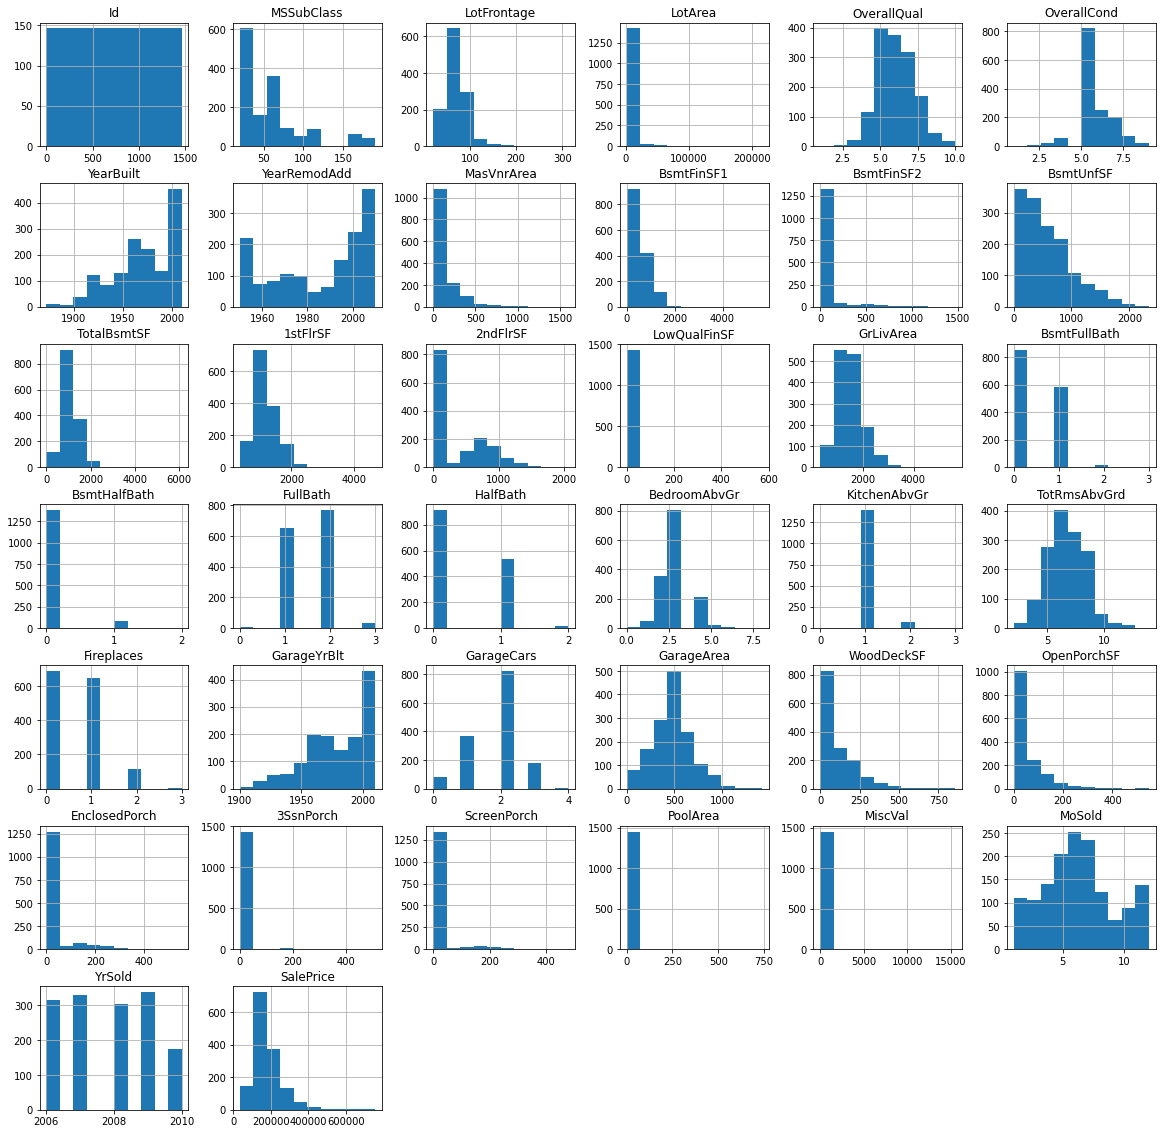

In [89]:
step("Sélectionnez les variables int64 + float64 afin d'afficher les histogrammes pour l'ensemble de ces variables. Qu'elles sont les variables ayant une distribution proche de SalePrice? Que peut on conclure de ces variables?")
digit_cols = [col for col in df if df[col].dtype != "object"]
df[digit_cols].hist(figsize=(20,20));

Certaines distributions semblent très proches du prix de vente ce qui suggère une correlation : OverallQual (qualité, finitions et matériaux), GrLivArea (surface des pièces de vie), GarageCars (capacité du garage en nombre de véhicules), GarageArea (surface du garage), TotalBsmtSF (surface totale), 1stFlrSF (surface 1er étage), FullBath (salle de bain)

In [90]:
step("Toujours sur les variables int64 + float64: Affichez les 10 variables les plus corrélées avec SalePrice (Avec Pandas il est possible de calculer les corrélation avec .corr()).") 
df[digit_cols].corr()["SalePrice"].sort_values(ascending = False)[1:11]

✅ *Toujours sur les variables int64 + float64: Affichez les 10 variables les plus corrélées avec SalePrice (Avec Pandas il est possible de calculer les corrélation avec .corr()).*

OverallQual    0.8
GrLivArea      0.7
GarageCars     0.6
GarageArea     0.6
TotalBsmtSF    0.6
1stFlrSF       0.6
FullBath       0.6
TotRmsAbvGrd   0.5
YearBuilt      0.5
YearRemodAdd   0.5
Name: SalePrice, dtype: float64

✅ *Toujours sur les variables int64 + float64: Réalisez un pairplot permettant d'afficher la relation entre SalePrice et les variables sélectionnés. Qu'elle est la forme des plot croisant les 3 variables les plus corrélées avec SalePrice?*

Ce sont des formes plutôt linéaire. Concernant la qualité la queue de la distribution est plutôt étalée à gauche, pour la surface l'ascendance de la courbe est plus rapide ce qui signifie que la qualité sera proportionnel au budget mais que la surface augmente très vite avec un peu plus de budget, dans les deux cas il y a des exceptions, notemments certains biens d'excellente ou qualité ou de grande surface et peu cher.

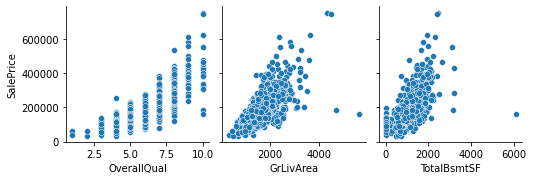

In [91]:
step("Toujours sur les variables int64 + float64: Réalisez un pairplot permettant d'afficher la relation entre SalePrice et les variables sélectionnés. Qu'elle est la forme des plot croisant les 3 variables les plus corrélées avec SalePrice?")
sns.pairplot(df[digit_cols], x_vars= ["OverallQual", "GrLivArea", "TotalBsmtSF"], y_vars = ["SalePrice"])
md("Ce sont des formes plutôt linéaire. Concernant la qualité la queue de la distribution est plutôt étalée à gauche, pour la surface l'ascendance de la courbe est plus rapide ce qui signifie que la qualité sera proportionnel au budget mais que la surface augmente très vite avec un peu plus de budget, dans les deux cas il y a des exceptions, notemments certains biens d'excellente ou qualité ou de grande surface et peu cher.")

✅ *Réalisez une heatmap afin de visualiser d'une autre manière les corrélations 2 à 2. Y'a t'il des variables fortement corrélées entre elles? Identifiez les 3 pairs les plus corrélées*

<AxesSubplot:>

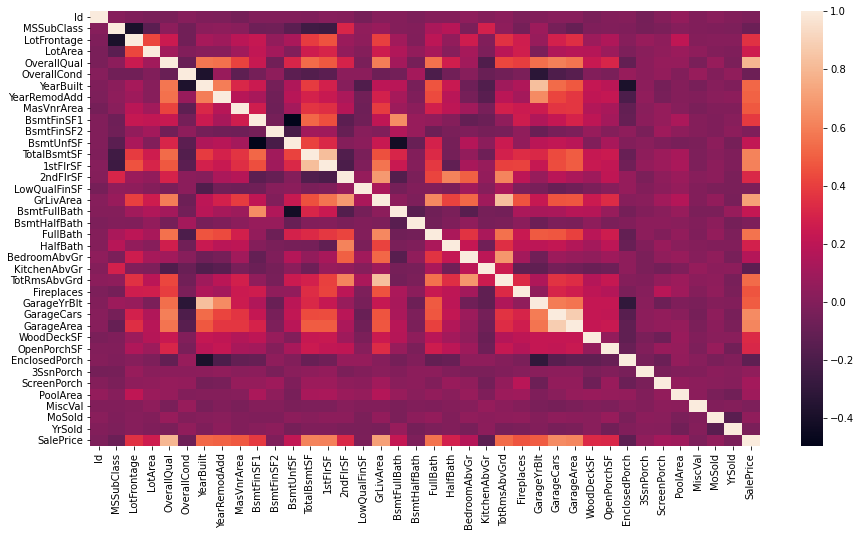

In [92]:
step("Réalisez une heatmap afin de visualiser d'une autre manière les corrélations 2 à 2. Y'a t'il des variables fortement corrélées entre elles? Identifiez les 3 pairs les plus corrélées")
corr = df[digit_cols].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr)

In [93]:
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.1,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.1,-0.0,0.0,0.0,-0.0
MSSubClass,0.0,1.0,-0.4,-0.1,0.0,-0.1,0.0,0.0,0.0,-0.1,-0.1,-0.1,-0.2,-0.3,0.3,0.0,0.1,0.0,-0.0,0.1,0.2,-0.0,0.3,0.0,-0.0,0.1,-0.0,-0.1,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.1
LotFrontage,-0.0,-0.4,1.0,0.4,0.3,-0.1,0.1,0.1,0.2,0.2,0.0,0.1,0.4,0.5,0.1,0.0,0.4,0.1,-0.0,0.2,0.1,0.3,-0.0,0.4,0.3,0.1,0.3,0.3,0.1,0.2,0.0,0.1,0.0,0.2,0.0,0.0,0.0,0.4
LotArea,-0.0,-0.1,0.4,1.0,0.1,-0.0,0.0,0.0,0.1,0.2,0.1,-0.0,0.3,0.3,0.1,0.0,0.3,0.2,0.0,0.1,0.0,0.1,-0.0,0.2,0.3,-0.0,0.2,0.2,0.2,0.1,-0.0,0.0,0.0,0.1,0.0,0.0,-0.0,0.3
OverallQual,-0.0,0.0,0.3,0.1,1.0,-0.1,0.6,0.6,0.4,0.2,-0.1,0.3,0.5,0.5,0.3,-0.0,0.6,0.1,-0.0,0.6,0.3,0.1,-0.2,0.4,0.4,0.5,0.6,0.6,0.2,0.3,-0.1,0.0,0.1,0.1,-0.0,0.1,-0.0,0.8
OverallCond,0.0,-0.1,-0.1,-0.0,-0.1,1.0,-0.4,0.1,-0.1,-0.0,0.0,-0.1,-0.2,-0.1,0.0,0.0,-0.1,-0.1,0.1,-0.2,-0.1,0.0,-0.1,-0.1,-0.0,-0.3,-0.2,-0.2,-0.0,-0.0,0.1,0.0,0.1,-0.0,0.1,-0.0,0.0,-0.1
YearBuilt,-0.0,0.0,0.1,0.0,0.6,-0.4,1.0,0.6,0.3,0.2,-0.0,0.1,0.4,0.3,0.0,-0.2,0.2,0.2,-0.0,0.5,0.2,-0.1,-0.2,0.1,0.1,0.8,0.5,0.5,0.2,0.2,-0.4,0.0,-0.1,0.0,-0.0,0.0,-0.0,0.5
YearRemodAdd,-0.0,0.0,0.1,0.0,0.6,0.1,0.6,1.0,0.2,0.1,-0.1,0.2,0.3,0.2,0.1,-0.1,0.3,0.1,-0.0,0.4,0.2,-0.0,-0.1,0.2,0.1,0.6,0.4,0.4,0.2,0.2,-0.2,0.0,-0.0,0.0,-0.0,0.0,0.0,0.5
MasVnrArea,-0.1,0.0,0.2,0.1,0.4,-0.1,0.3,0.2,1.0,0.3,-0.1,0.1,0.4,0.3,0.2,-0.1,0.4,0.1,0.0,0.3,0.2,0.1,-0.0,0.3,0.2,0.3,0.4,0.4,0.2,0.1,-0.1,0.0,0.1,0.0,-0.0,-0.0,-0.0,0.5
BsmtFinSF1,-0.0,-0.1,0.2,0.2,0.2,-0.0,0.2,0.1,0.3,1.0,-0.1,-0.5,0.5,0.4,-0.1,-0.1,0.2,0.6,0.1,0.1,0.0,-0.1,-0.1,0.0,0.3,0.2,0.2,0.3,0.2,0.1,-0.1,0.0,0.1,0.1,0.0,-0.0,0.0,0.4


In [94]:
get_corr_max(corr)

,GarageArea,GarageCars,GarageYrBlt,YearBuilt,GrLivArea,TotRmsAbvGrd,TotalBsmtSF,1stFlrSF,SalePrice,OverallQual,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFullBath,YearRemodAdd,FullBath,HalfBath,MasVnrArea,Fireplaces,LotFrontage,LotArea,BsmtUnfSF,OpenPorchSF,WoodDeckSF,MSSubClass,KitchenAbvGr,PoolArea,ScreenPorch,BsmtFinSF2,LowQualFinSF,OverallCond,BsmtHalfBath,MoSold,EnclosedPorch,3SsnPorch,MiscVal,YrSold,Id
0,0.9,0.9,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.7,0.7,0.6,0.6,0.6,0.6,0.6,0.5,0.5,0.5,0.4,0.4,0.3,0.3,0.3,0.3,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,OverallCond,OverallCond,OverallCond,EnclosedPorch,OverallCond,OverallCond,MSSubClass,MSSubClass,KitchenAbvGr,KitchenAbvGr,1stFlrSF,BsmtFullBath,BsmtUnfSF,BsmtUnfSF,EnclosedPorch,OverallCond,1stFlrSF,OverallCond,KitchenAbvGr,MSSubClass,MSSubClass,BsmtFinSF1,EnclosedPorch,EnclosedPorch,LotFrontage,OverallQual,YrSold,EnclosedPorch,BsmtUnfSF,YearBuilt,YearBuilt,BsmtFullBath,YrSold,YearBuilt,Id,GarageCars,MoSold,MasVnrArea


1) GarageArea et GarageCars : 0.9
2) GarageYrBlt et YearBuilt : 0.8
3) GrLivArea et TotRmsAbvGrd : 0.8

In [95]:
step("Sur cette sélection de variables: ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'] réalisez un regplot permettant de croiser ces variables avec SalePrice.")
cols = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']
df = df[cols]

✅ *Sur cette sélection de variables: ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'] réalisez un regplot permettant de croiser ces variables avec SalePrice.*

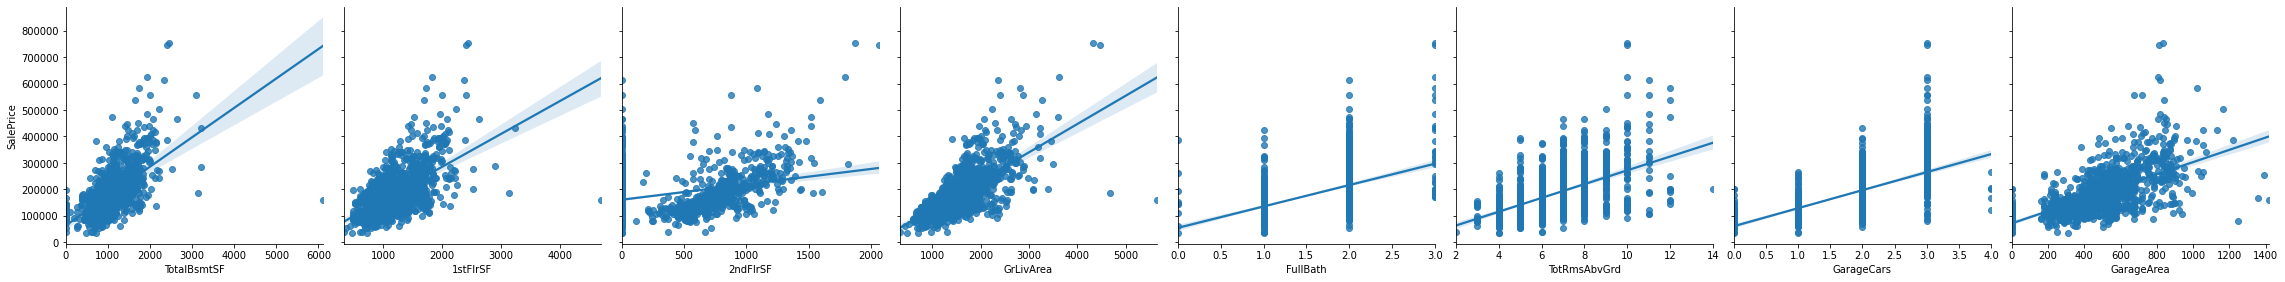

In [96]:
# for i,col in enumerate(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']):
#     plt.figure(i)
#     sns.regplot(x=df[col], y=df["SalePrice"]);
    
g = sns.PairGrid(df, y_vars=["SalePrice"], x_vars=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'], height = 4)
g.map(sns.regplot)

✅ *En vous inspirant de: https://stackoverflow.com/questions/25579227/seaborn-implot-with-equation-and-r2-text Afficher le jointplot avec le coefficient de pearson pour le croisement SalePrice & GrLivArea.*

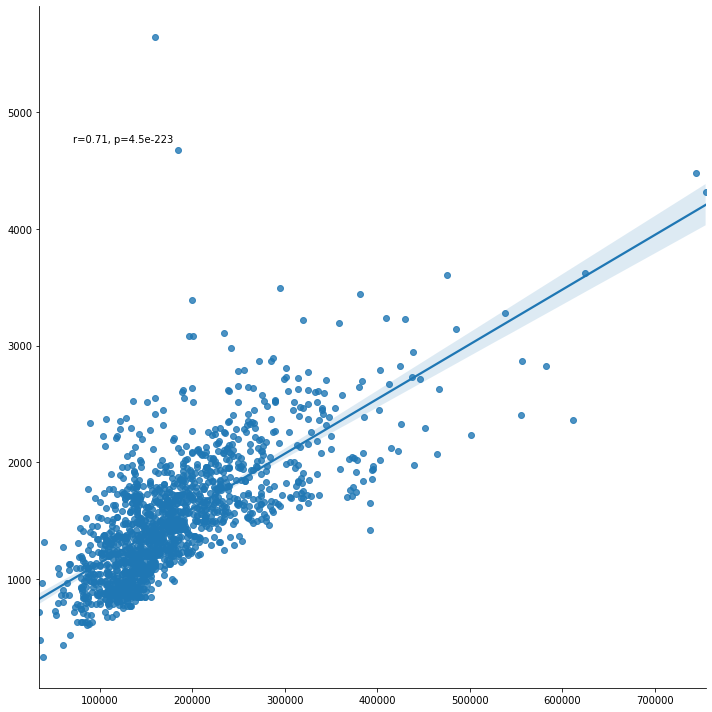

In [97]:
step("En vous inspirant de: https://stackoverflow.com/questions/25579227/seaborn-implot-with-equation-and-r2-text Afficher le jointplot avec le coefficient de pearson pour le croisement SalePrice & GrLivArea.")

g = sns.lmplot(x='SalePrice', y='GrLivArea', data=df, height=10, aspect=1)

def annotate(data, **kws):
    r, p = stats.pearsonr(df['SalePrice'], df['GrLivArea'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.show()

In [98]:
# step("Réalisez un code permettant d'identifier automatiquement les variables de type Object")
# from sklearn.preprocessing import OneHotEncoder
# df = _df.copy()
# obj_cols = [col for col in df if df[col].dtype == "object"]
# enc = OneHotEncoder(handle_unknown='ignore')

# df_encoder = pd.DataFrame(df["SalePrice"])
# for col in obj_cols:
#     df_encoder[col] = LE.fit_transform(df[col])
    
# display(df_encoder.sample())

In [99]:
step("Réalisez un code permettant d'identifier automatiquement les variables de type Object")
from sklearn.preprocessing import OneHotEncoder
df = _df.copy()
obj_cols = [col for col in df if df[col].dtype == "object"]
# display(df[obj_cols].sample())
step("Sur la liste de variables obtenus, utilisez un countplot sur toutes les variables")
sale_price = df["SalePrice"]
df = df[obj_cols]
dum_df = pd.get_dummies(df, columns=obj_cols)
dum_df["SalePrice"] = sale_price
df_encoder = dum_df

display(df_encoder.sample())

# f, axes = plt.subplots(9,5,figsize=(20,20), sharex=True)
# for f,ax in zip(obj_cols, axes.ravel()):
#     sns.countplot(df[f], ax=ax)




✅ *Réalisez un code permettant d'identifier automatiquement les variables de type Object*

✅ *Sur la liste de variables obtenus, utilisez un countplot sur toutes les variables*

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondi

In [100]:
step("Listez au moins 5 variables que ne vous semble pas pertinente pour expliquer le prix d'une maison.")
corr = df_encoder.corr()["SalePrice"].abs()[1:].sort_values()
# dict(corr)

✅ *Listez au moins 5 variables que ne vous semble pas pertinente pour expliquer le prix d'une maison.*

Ces variales n'ont aucune conséquence sur le prix d'une maison:
* GarageQual      
* Condition2     
* BsmtFinType2   
* Utilities       
* BsmtCond       
* LandContour    
* GarageCond     
* MasVnrType     
* Street          

In [101]:
step("Inspirez vous de: https://www.kaggle.com/dansbecker/your-first-machine-learning-model pour créér votre premier modèle de ML avec le modèle suivant: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html")
df = _df.copy()[digit_cols]

✅ *Inspirez vous de: https://www.kaggle.com/dansbecker/your-first-machine-learning-model pour créér votre premier modèle de ML avec le modèle suivant: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html*

In [102]:
md("**Random Forest & Decision Tree**")

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


def d_tree(max_leaf_nodes, data):
    train_X, val_X, train_y, val_y = data
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    return model.predict(val_X)

def rand_forest(max_leaf_nodes, data):
    train_X, val_X, train_y, val_y = data
    forest_model = RandomForestRegressor(random_state=1)
    forest_model.fit(train_X, train_y)
    return forest_model.predict(val_X)

def get_mae(predictions, val_y):
    return mean_absolute_error(val_y, predictions)

df.dropna(inplace = True)

y = df.SalePrice
features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]
X = df[features]


train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
data = (train_X, val_X, train_y, val_y)
#niveau de profondeur optimal = 54
for max_leaf_nodes in [2, 50, 50000]:
    predictions = d_tree(54, data)
    mae = get_mae(predictions, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, mae))


print("solution :")
display(val_y[:5])


print("Decision Tree")
dt_preds = d_tree(54, data)
dt_mae = get_mae(dt_preds, val_y)
print("mae : ", dt_mae)
display(predictions[:5])

print("Random Forest")
rf_preds = rand_forest(54, data)
rf_mae = get_mae(rf_preds, val_y)
print("mae : ", rf_mae)
display(predictions[:5])

pd.DataFrame({
    "solution" : val_y.values,
    "decision tree" : dt_preds,
    "random forest" : rf_preds,
})


**Random Forest & Decision Tree**

Max leaf nodes: 2  		 Mean Absolute Error:  22469
Max leaf nodes: 50  		 Mean Absolute Error:  22469
Max leaf nodes: 50000  		 Mean Absolute Error:  22469
solution :


1007     88000
1196    219210
507     208300
1322    190000
659     167000
Name: SalePrice, dtype: int64

Decision Tree
mae :  22469.268475508303


array([ 65830.14285714, 218023.12      , 142436.5125    , 218023.12      ,
       184350.        ])

Random Forest
mae :  19906.345256227756


array([ 65830.14285714, 218023.12      , 142436.5125    , 218023.12      ,
       184350.        ])

,solution,decision tree,random forest
0,88000,65830.1,97554.9
1,219210,218023.1,230692.1
2,208300,142436.5,177957.0
3,190000,218023.1,203468.0
4,167000,184350.0,178491.0
...,...,...,...
276,189950,157073.7,161385.8
277,324000,277457.1,298222.7
278,256000,239000.0,196185.0
279,140000,142436.5,146480.0


on va d'abord tester chaque variable explicative indépendement (univarié) puis en groupe (multivarié)

**Univarié**

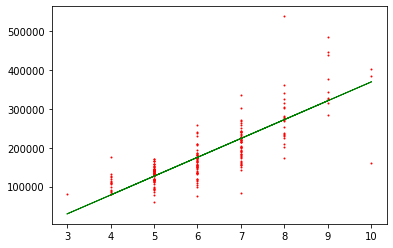

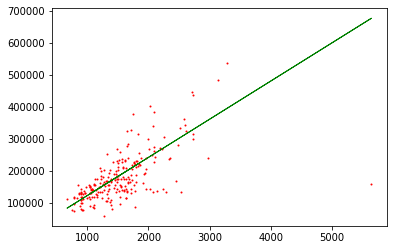

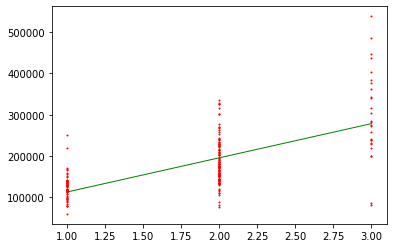

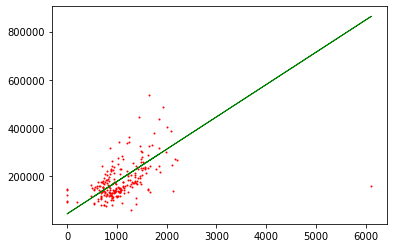

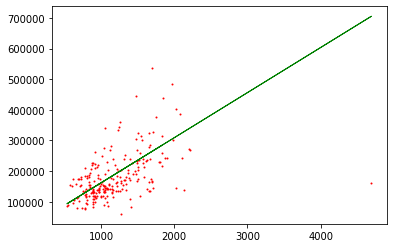

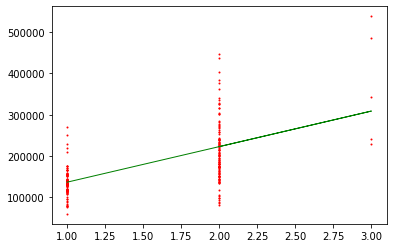

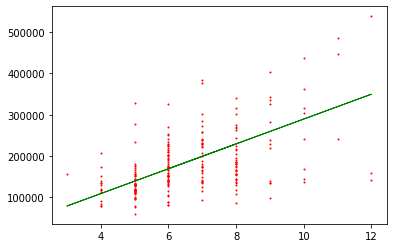

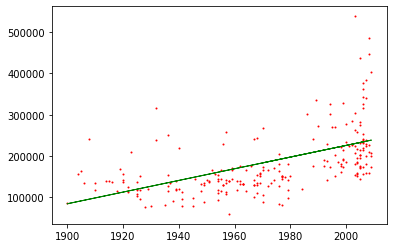

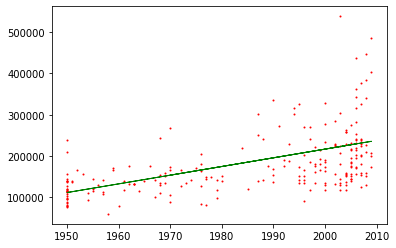

,X,R^2=,MAE,MSE,RMSE
0,[OverallQual],0.6,30886.1,2071924957.6,45518.4
1,[GrLivArea],0.3,39288.7,3832893484.0,61910.4
2,[GarageCars],0.4,42474.0,3372959124.2,58077.2
3,[TotalBsmtSF],-0.0,51781.9,6088286923.1,78027.5
4,[1stFlrSF],0.1,50074.0,5341570570.3,73086.0
5,[FullBath],0.3,44200.3,3819412135.8,61801.4
6,[TotRmsAbvGrd],0.3,49978.9,4340683404.6,65883.9
7,[YearBuilt],0.3,47393.9,4080756609.4,63880.8
8,[YearRemodAdd],0.3,47478.0,4236048782.2,65084.9


**Multivarié**

,X,R^2=,MAE,MSE,RMSE
0,[OverallQual],0.6,30886.1,2071924957.6,45518.4
1,"[OverallQual, GrLivArea]",0.6,29628.6,2127695937.2,46127.0
2,"[OverallQual, GrLivArea, GarageCars]",0.7,28138.4,1848839370.4,42998.1
3,"[OverallQual, GrLivArea, GarageCars, TotalBsmtSF]",0.6,27206.2,2607230137.4,51061.0
4,"[OverallQual, GrLivArea, GarageCars, TotalBsmtSF, 1stFlrSF]",0.6,27252.1,2599824640.2,50988.5
5,"[OverallQual, GrLivArea, GarageCars, TotalBsmtSF, 1stFlrSF, FullBath]",0.5,27211.0,2609631373.4,51084.6
6,"[OverallQual, GrLivArea, GarageCars, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd]",0.5,27150.2,2651607449.1,51493.8
7,"[OverallQual, GrLivArea, GarageCars, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt]",0.5,26493.1,2669011623.7,51662.5
8,"[OverallQual, GrLivArea, GarageCars, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd]",0.5,26561.8,2685393909.1,51820.8


In [103]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from numpy import mean
from numpy import std
from numpy import absolute
import sklearn.linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics


def g_scatter(x_values, y_values, title, x_label, y_label, line = None): 
    plt.plot(x_values, y_values, 'ro', markersize=1)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if line:
        plt.plot(line[0], line[1], color='green', linewidth=1)
    plt.show()

def d_tree(max_leaf_nodes, data):
    train_X, val_X, train_y, val_y = data
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    return model.predict(val_X)

def rand_forest(max_leaf_nodes, data):
    train_X, val_X, train_y, val_y = data
    forest_model = RandomForestRegressor(random_state=1)
    forest_model.fit(train_X, train_y)
    return forest_model.predict(val_X)

def get_mae(predictions, val_y):
    return mean_absolute_error(val_y, predictions)

df.dropna(inplace = True)

# def train_linear_regression(*data):
#     from sklearn import linear_model
#     regr = linear_model.LinearRegression()
#     regr.fit(xtrain, ytrain)
#     ytrainpred = regr.predict(xtrain)
#     g_scatter(xtrain, ytrain, "", "", "", [xtrain, ytrainpred])
#     ytrainpred = regr.predict(xtrain)
#     ytestpred = regr.predict(xtest)
#     print("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}".format(round(r2_score(ytrain, ytrainpred),3), round(r2_score(ytest, ytestpred),3)))
#     print(xtest.shape, ytest.shape)
#     g_scatter(xtest, ytest, "", "", "", [xtest, ytestpred])
    
def multi_reg(df, X_cols, y_col, reports, graph = True):
#     print("Regression linéaire pour prédire la valeure de {} à partir des variables suivantes : {}".format(y_col, X_cols))

    X = df[X_cols]
    y = df[y_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    lreg = LinearRegression()
    lreg.fit(X_train,y_train)
    y_pred_lreg = lreg.predict(X_test)
    report = {}
    report['X'] = X_cols.copy()
    report['R^2='] = metrics.explained_variance_score(y_test,y_pred_lreg)
    report['MAE'] = metrics.mean_absolute_error(y_test,y_pred_lreg)
    report['MSE'] = metrics.mean_squared_error(y_test,y_pred_lreg)
    report['RMSE'] = np.sqrt(metrics.mean_squared_error(y_test,y_pred_lreg))
    reports.append(report)
    
    if graph:
        g_scatter(X_test, y_test, "", "", "", [X_test, y_pred_lreg])

        
        
y = "SalePrice"
X_cols = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]


md("on va d'abord tester chaque variable explicative indépendement (univarié) puis en groupe (multivarié)")
md("**Univarié**")
reports = []
for X in X_cols:
    multi_reg(df, [X], y, reports)
    
display(pd.DataFrame(reports))
    
md("**Multivarié**")
reports = []
multi_X = []
for X in X_cols:
    multi_X.append(X)
    multi_reg(df, multi_X, y, reports, graph = False)


display(pd.DataFrame(reports))
           
           
# model = Ridge(alpha=1.0)
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# scores = absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

# #niveau de profondeur optimal = 54
# for max_leaf_nodes in [2, 50, 50000]:
#     predictions = d_tree(54, data)
#     mae = get_mae(predictions, val_y)
#     print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, mae))


# print("solution :")
# display(val_y[:5])


# print("Decision Tree")
# dt_preds = d_tree(54, data)
# dt_mae = get_mae(dt_preds, val_y)
# print("mae : ", dt_mae)
# display(predictions[:5])

# print("Random Forest")
# rf_preds = rand_forest(54, data)
# rf_mae = get_mae(rf_preds, val_y)
# print("mae : ", rf_mae)
# display(predictions[:5])

# pd.DataFrame({
#     "solution" : val_y.values,
#     "decision tree" : dt_preds,
#     "random forest" : rf_preds,
# })





# model = DecisionTreeRegressor(max_leaf_nodes = 54, random_state = 1)
# model.fit(train_X, train_y)
# predictions = model.predict(val_X)
# display(predictions[:5])
# mae = mean_absolute_error(val_y, predictions)
# print(mae)
# display(val_y[:5])

# def split_train_test(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

# group_size = df.shape[0] // 3
# train, validate, test = df[:group_size], df[group_size:group_size*2], df[2+group_size*2:]

# for table in [train, validate, test]:
#     print(table.shape)
# model = LinearRegression()
# X = test
# y = train
# model.fit(X, y)
# print("score", model.score(X, y))
# predictions = model.predict(validate)
# print(predictions)

# plt.scatter(X, y);
# plt.plot(X, predictions, c="r");


**Ridge et Lasso**

2685393909.0564117


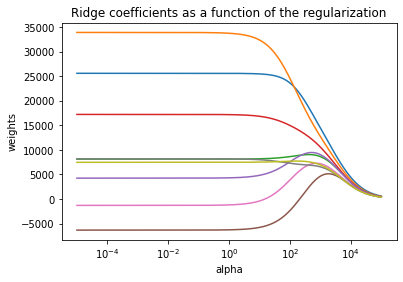

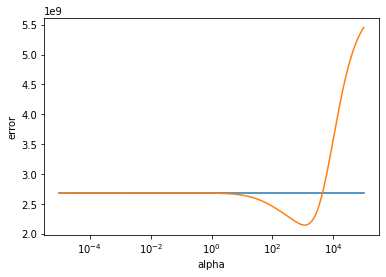

best alpha is  1096.9857978923862
2685393909.0564117


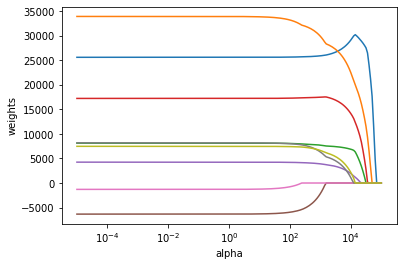

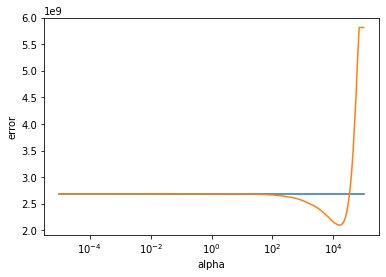

best alpha is  15702.901247293776


In [104]:
from sklearn import linear_model
from sklearn import preprocessing

y = "SalePrice"
X = df[["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]]

std_scale = preprocessing.StandardScaler().fit(X)
X_scale = std_scale.transform(X)

def ridge(df, X, y_col):
    
    # on fait notre régression
    y = df[y_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    lreg = LinearRegression()
    lreg.fit(X_train,y_train)
    y_pred_lreg = lreg.predict(X_test)
    # on recupère l'erreur quadratique moyenne
    baseline_error = metrics.mean_squared_error(y_test,y_pred_lreg)
    print(baseline_error)
    
    
    # on test plusieurs valeurs de alpha qui est le coefficient de biais que l'on applique sur notre régression (plus alpha est grand moins les outliners ont d'influence)
    n_alphas = 200
    alphas = np.logspace(-5, 5, n_alphas)
    ridge = linear_model.Ridge()
    coefs = []
    errors = []
    for a in alphas:
        ridge.set_params(alpha=a)
        ridge.fit(X_train, y_train)
        coefs.append(ridge.coef_)
        errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])
    ax = plt.gca()

    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title('Ridge coefficients as a function of the regularization')
    plt.axis('tight')
    plt.show()
    
    ax = plt.gca()
    ax.plot(alphas, errors)
    ax.set_xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('error')
    plt.axis('tight')
    plt.show()
    
    index = errors.index(min(errors))
    print("best alpha is ", alphas[index])
    
def lasso(df, X, y_col):
    
    
    # on fait notre régression
    y = df[y_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    lreg = LinearRegression()
    lreg.fit(X_train,y_train)
    y_pred_lreg = lreg.predict(X_test)
    # on recupère l'erreur quadratique moyenne
    baseline_error = metrics.mean_squared_error(y_test,y_pred_lreg)
    print(baseline_error)
    
    
    n_alphas = 200
    alphas = np.logspace(-5, 5, n_alphas)
    lasso = linear_model.Lasso()

    coefs = []
    errors = []
    for a in alphas:
        lasso.set_params(alpha=a)
        lasso.fit(X_train, y_train)
        coefs.append(lasso.coef_)
        errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])
        
    ax = plt.gca()

    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.axis('tight')
    plt.show()
    
    ax = plt.gca()
    ax.plot(alphas, errors)
    ax.set_xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('error')
    plt.axis('tight')
    plt.show()
    
    index = errors.index(min(errors))
    print("best alpha is ", alphas[index])

ridge(df, X_scale, y)
lasso(df, X_scale, y)


In [105]:
best_alpha_for_ridge = 1096.9857978923862
best_alpha_for_lasso = 15702.901247293776

def reg_ridge(df, X, y_col, alpha, reports):
    y = df[y_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    ridge = linear_model.Lasso()
    ridge.fit(X_train, y_train)
    y_pred_lreg = ridge.predict(X_test)
    report = {}
    report['X'] = X_cols.copy()
    report['R^2='] = metrics.explained_variance_score(y_test,y_pred_lreg)
    report['MAE'] = metrics.mean_absolute_error(y_test,y_pred_lreg)
    report['MSE'] = metrics.mean_squared_error(y_test,y_pred_lreg)
    report['RMSE'] = np.sqrt(metrics.mean_squared_error(y_test,y_pred_lreg))
    reports.append(report)
#     g_scatter(X_test, y_test, "", "", "", [X_test, y_pred_lreg])
    
y = "SalePrice"
X = df[["OverallQual", "GrLivArea", "GarageCars"]]
    
reports = []
reg_ridge(df, X, y, 1, reports)

display(pd.DataFrame(reports))

,X,R^2=,MAE,MSE,RMSE
0,"[OverallQual, GrLivArea, GarageCars, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd]",0.7,28138.2,1848862314.5,42998.4


# ANNEXES REGRESSIONS

In [106]:
df = _df.copy()

In [107]:
#corr with label
# FireplaceQu     0.5
# GarageFinish    0.5
# KitchenQual     0.6
# BsmtQual        0.6
# ExterQual       0.6

#corr with hotencoder
#  'SaleType_New': 0.3575094050831932,
#  'MasVnrType_None': 0.37446767345546,
#  'Neighborhood_NridgHt': 0.40214859817526777,
#  'GarageFinish_Unf': 0.410608311291673,
#  'GarageFinish_Fin': 0.41967796781801625,
#  'HeatingQC_Ex': 0.43454323853246873,
#  'BsmtFinType1_GLQ': 0.4345973468827764,
#  'ExterQual_Ex': 0.4511643302227565,
#  'BsmtQual_TA': 0.4523935323501029,
#  'ExterQual_Gd': 0.4524661278447932,
#  'Foundation_PConc': 0.4977337525869374,
#  'KitchenQual_Ex': 0.5040936759052969,
#  'KitchenQual_TA': 0.519297853654885,
#  'BsmtQual_Ex': 0.5531048470089394,
#  'ExterQual_TA': 0.5890435234097584,

# df = df[["SalePrice", "FireplaceQu", "GarageFinish", "KitchenQual", "BsmtQual", "ExterQual", "Foundation"]]

df_encoder.columns


def multi_reg(df, X_cols, y_col, reports):
#     print("Regression linéaire pour prédire la valeure de {} à partir des variables suivantes : {}".format(y_col, X_cols))

    X = df[X_cols]
    y = df[y_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    lreg = LinearRegression()
    lreg.fit(X_train,y_train)
    y_pred_lreg = lreg.predict(X_test)
    report = {}
    report['X'] = X_cols.copy()
    report['R^2='] = metrics.explained_variance_score(y_test,y_pred_lreg)
    report['MAE'] = metrics.mean_absolute_error(y_test,y_pred_lreg)
    report['MSE'] = metrics.mean_squared_error(y_test,y_pred_lreg)
    report['RMSE'] = np.sqrt(metrics.mean_squared_error(y_test,y_pred_lreg))
    reports.append(report)
#     g_scatter(X_test, y_test, "", "", "", [X_test, y_pred_lreg])

        
key_cols = ["SalePrice", "FireplaceQu", "GarageFinish", "KitchenQual", "BsmtQual", "ExterQual", "Foundation"]  
y = "SalePrice"
X_cols = []
for col_enc in df_encoder:
    for key_col in key_cols:
        if key_col in col_enc:
            X_cols.append(col_enc)

            


print(X_cols)


md("on va d'abord tester chaque variable explicative indépendement (univarié) puis en groupe (multivarié)")
md("**Univarié**")
reports = []
for X in X_cols:
    multi_reg(df_encoder, [X], y, reports)
    
display(pd.DataFrame(reports).sort_values(by="R^2=", ascending = False))
    
md("**Multivarié**")
reports = []
multi_X = []
for X in X_cols:
    multi_X.append(X)
    multi_reg(df_encoder, multi_X, y, reports)


display(pd.DataFrame(reports).sort_values(by="R^2=", ascending = False))

pd.set_option('max_colwidth', 600)

['ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf', 'SalePrice']


on va d'abord tester chaque variable explicative indépendement (univarié) puis en groupe (multivarié)

**Univarié**

,X,R^2=,MAE,MSE,RMSE
26,[SalePrice],1.0,0.0,0.0,0.0
3,[ExterQual_TA],0.4,44338.9,4360864557.9,66036.8
10,[BsmtQual_Ex],0.3,48684.3,4644303172.9,68149.1
14,[KitchenQual_Ex],0.3,49736.0,4702581141.6,68575.4
17,[KitchenQual_TA],0.3,47542.7,5167766167.7,71887.2
23,[GarageFinish_Fin],0.2,51817.9,5318876048.5,72930.6
0,[ExterQual_Ex],0.2,51023.2,5322838698.6,72957.8
6,[Foundation_PConc],0.2,49922.5,5422525618.4,73637.8
13,[BsmtQual_TA],0.2,49498.8,5607792889.6,74885.2
2,[ExterQual_Gd],0.2,47944.8,5604148024.1,74860.9


**Multivarié**

,X,R^2=,MAE,MSE,RMSE
26,"[ExterQual_Ex, ExterQual_Fa, ExterQual_Gd, ExterQual_TA, Foundation_BrkTil, Foundation_CBlock, Foundation_PConc, Foundation_Slab, Foundation_Stone, Foundation_Wood, BsmtQual_Ex, BsmtQual_Fa, BsmtQual_Gd, BsmtQual_TA, KitchenQual_Ex, KitchenQual_Fa, KitchenQual_Gd, KitchenQual_TA, FireplaceQu_Ex, FireplaceQu_Fa, FireplaceQu_Gd, FireplaceQu_Po, FireplaceQu_TA, GarageFinish_Fin, GarageFinish_RFn, GarageFinish_Unf, SalePrice]",1.0,0.0,0.0,0.0
25,"[ExterQual_Ex, ExterQual_Fa, ExterQual_Gd, ExterQual_TA, Foundation_BrkTil, Foundation_CBlock, Foundation_PConc, Foundation_Slab, Foundation_Stone, Foundation_Wood, BsmtQual_Ex, BsmtQual_Fa, BsmtQual_Gd, BsmtQual_TA, KitchenQual_Ex, KitchenQual_Fa, KitchenQual_Gd, KitchenQual_TA, FireplaceQu_Ex, FireplaceQu_Fa, FireplaceQu_Gd, FireplaceQu_Po, FireplaceQu_TA, GarageFinish_Fin, GarageFinish_RFn, GarageFinish_Unf]",0.6,31735.5,2552296471.7,50520.3
24,"[ExterQual_Ex, ExterQual_Fa, ExterQual_Gd, ExterQual_TA, Foundation_BrkTil, Foundation_CBlock, Foundation_PConc, Foundation_Slab, Foundation_Stone, Foundation_Wood, BsmtQual_Ex, BsmtQual_Fa, BsmtQual_Gd, BsmtQual_TA, KitchenQual_Ex, KitchenQual_Fa, KitchenQual_Gd, KitchenQual_TA, FireplaceQu_Ex, FireplaceQu_Fa, FireplaceQu_Gd, FireplaceQu_Po, FireplaceQu_TA, GarageFinish_Fin, GarageFinish_RFn]",0.6,31910.5,2567615571.4,50671.6
23,"[ExterQual_Ex, ExterQual_Fa, ExterQual_Gd, ExterQual_TA, Foundation_BrkTil, Foundation_CBlock, Foundation_PConc, Foundation_Slab, Foundation_Stone, Foundation_Wood, BsmtQual_Ex, BsmtQual_Fa, BsmtQual_Gd, BsmtQual_TA, KitchenQual_Ex, KitchenQual_Fa, KitchenQual_Gd, KitchenQual_TA, FireplaceQu_Ex, FireplaceQu_Fa, FireplaceQu_Gd, FireplaceQu_Po, FireplaceQu_TA, GarageFinish_Fin]",0.6,32545.4,2598007983.9,50970.7
22,"[ExterQual_Ex, ExterQual_Fa, ExterQual_Gd, ExterQual_TA, Foundation_BrkTil, Foundation_CBlock, Foundation_PConc, Foundation_Slab, Foundation_Stone, Foundation_Wood, BsmtQual_Ex, BsmtQual_Fa, BsmtQual_Gd, BsmtQual_TA, KitchenQual_Ex, KitchenQual_Fa, KitchenQual_Gd, KitchenQual_TA, FireplaceQu_Ex, FireplaceQu_Fa, FireplaceQu_Gd, FireplaceQu_Po, FireplaceQu_TA]",0.6,32761.8,2632762580.3,51310.5
16,"[ExterQual_Ex, ExterQual_Fa, ExterQual_Gd, ExterQual_TA, Foundation_BrkTil, Foundation_CBlock, Foundation_PConc, Foundation_Slab, Foundation_Stone, Foundation_Wood, BsmtQual_Ex, BsmtQual_Fa, BsmtQual_Gd, BsmtQual_TA, KitchenQual_Ex, KitchenQual_Fa, KitchenQual_Gd]",0.6,35166.2,2774285866.2,52671.5
17,"[ExterQual_Ex, ExterQual_Fa, ExterQual_Gd, ExterQual_TA, Foundation_BrkTil, Foundation_CBlock, Foundation_PConc, Foundation_Slab, Foundation_Stone, Foundation_Wood, BsmtQual_Ex, BsmtQual_Fa, BsmtQual_Gd, BsmtQual_TA, KitchenQual_Ex, KitchenQual_Fa, KitchenQual_Gd, KitchenQual_TA]",0.6,35197.8,2777331287.8,52700.4
15,"[ExterQual_Ex, ExterQual_Fa, ExterQual_Gd, ExterQual_TA, Foundation_BrkTil, Foundation_CBlock, Foundation_PConc, Foundation_Slab, Foundation_Stone, Foundation_Wood, BsmtQual_Ex, BsmtQual_Fa, BsmtQual_Gd, BsmtQual_TA, KitchenQual_Ex, KitchenQual_Fa]",0.6,34630.8,2782590868.8,52750.3
14,"[ExterQual_Ex, ExterQual_Fa, ExterQual_Gd, ExterQual_TA, Foundation_BrkTil, Foundation_CBlock, Foundation_PConc, Foundation_Slab, Foundation_Stone, Foundation_Wood, BsmtQual_Ex, BsmtQual_Fa, BsmtQual_Gd, BsmtQual_TA, KitchenQual_Ex]",0.6,34897.3,2791697246.0,52836.5
18,"[ExterQual_Ex, ExterQual_Fa, ExterQual_Gd, ExterQual_TA, Foundation_BrkTil, Foundation_CBlock, Foundation_PConc, Foundation_Slab, Foundation_Stone, Foundation_Wood, BsmtQual_Ex, BsmtQual_Fa, BsmtQual_Gd, BsmtQual_TA, KitchenQual_Ex, KitchenQual_Fa, KitchenQual_Gd, KitchenQual_TA, FireplaceQu_Ex]",0.6,35282.8,2817758815.7,53082.6


In [108]:
df = _df.copy()
obj_cols = [col for col in df if df[col].dtype == "object"]

LE = LabelEncoder()
df_encoder = pd.DataFrame(df["SalePrice"])
for col in obj_cols:
    df_encoder[col] = LE.fit_transform(df[col]) 


display(df_encoder.sample())

#corr with label
# FireplaceQu     0.5
# GarageFinish    0.5
# KitchenQual     0.6
# BsmtQual        0.6
# ExterQual       0.6

#corr with hotencoder
#  'SaleType_New': 0.3575094050831932,
#  'MasVnrType_None': 0.37446767345546,
#  'Neighborhood_NridgHt': 0.40214859817526777,
#  'GarageFinish_Unf': 0.410608311291673,
#  'GarageFinish_Fin': 0.41967796781801625,
#  'HeatingQC_Ex': 0.43454323853246873,
#  'BsmtFinType1_GLQ': 0.4345973468827764,
#  'ExterQual_Ex': 0.4511643302227565,
#  'BsmtQual_TA': 0.4523935323501029,
#  'ExterQual_Gd': 0.4524661278447932,
#  'Foundation_PConc': 0.4977337525869374,
#  'KitchenQual_Ex': 0.5040936759052969,
#  'KitchenQual_TA': 0.519297853654885,
#  'BsmtQual_Ex': 0.5531048470089394,
#  'ExterQual_TA': 0.5890435234097584,

# df = df[["SalePrice", "FireplaceQu", "GarageFinish", "KitchenQual", "BsmtQual", "ExterQual", "Foundation"]]



def multi_reg(df, X_cols, y_col, reports):
#     print("Regression linéaire pour prédire la valeure de {} à partir des variables suivantes : {}".format(y_col, X_cols))

    X = df[X_cols]
    y = df[y_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    lreg = LinearRegression()
    lreg.fit(X_train,y_train)
    y_pred_lreg = lreg.predict(X_test)
    report = {}
    report['X'] = X_cols.copy()
    report['R^2='] = metrics.explained_variance_score(y_test,y_pred_lreg)
    report['MAE'] = metrics.mean_absolute_error(y_test,y_pred_lreg)
    report['MSE'] = metrics.mean_squared_error(y_test,y_pred_lreg)
    report['RMSE'] = np.sqrt(metrics.mean_squared_error(y_test,y_pred_lreg))
    reports.append(report)
#     g_scatter(X_test, y_test, "", "", "", [X_test, y_pred_lreg])

        
X_cols = ["FireplaceQu", "GarageFinish", "KitchenQual", "BsmtQual", "ExterQual", "Foundation"]  
y = "SalePrice"


md("on va d'abord tester chaque variable explicative indépendement (univarié) puis en groupe (multivarié)")
md("**Univarié**")
reports = []
for X in X_cols:
    multi_reg(df_encoder, [X], y, reports)
    
display(pd.DataFrame(reports).sort_values(by="R^2=", ascending = False))
    
md("**Multivarié**")
reports = []
multi_X = []
for X in X_cols:
    multi_X.append(X)
    multi_reg(df_encoder, multi_X, y, reports)


display(pd.DataFrame(reports).sort_values(by="R^2=", ascending = False))

pd.set_option('max_colwidth', 600)


,SalePrice,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
903,240000,3,1,2,0,1,0,1,0,8,2,2,0,2,3,1,12,13,1,2,4,2,2,3,3,5,5,1,0,1,4,2,6,2,1,1,4,4,2,3,4,4,6,5


on va d'abord tester chaque variable explicative indépendement (univarié) puis en groupe (multivarié)

**Univarié**

,X,R^2=,MAE,MSE,RMSE
4,[ExterQual],0.4,41028.3,3816412197.8,61777.1
3,[BsmtQual],0.4,42870.5,4225874674.5,65006.7
2,[KitchenQual],0.4,43500.3,4235226608.4,65078.6
1,[GarageFinish],0.3,44671.9,4568910662.9,67593.7
0,[FireplaceQu],0.2,50427.4,5522651491.8,74314.5
5,[Foundation],0.1,52147.5,6069728815.4,77908.5


**Multivarié**

,X,R^2=,MAE,MSE,RMSE
5,"[FireplaceQu, GarageFinish, KitchenQual, BsmtQual, ExterQual, Foundation]",0.6,33199.9,2716118373.4,52116.4
4,"[FireplaceQu, GarageFinish, KitchenQual, BsmtQual, ExterQual]",0.6,33308.9,2724493445.1,52196.7
3,"[FireplaceQu, GarageFinish, KitchenQual, BsmtQual]",0.6,34593.1,2811678438.9,53025.3
2,"[FireplaceQu, GarageFinish, KitchenQual]",0.5,37786.1,3207354319.2,56633.5
1,"[FireplaceQu, GarageFinish]",0.4,43823.7,4233736645.6,65067.2
0,[FireplaceQu],0.2,50427.4,5522651491.8,74314.5


In [109]:
df = _df.copy()
obj_cols = [col for col in df if df[col].dtype == "object"]

LE = LabelEncoder()
df_encoder = _df.copy()
for col in obj_cols:
    df_encoder[col] = LE.fit_transform(df[col])
    

df_encoder.dropna(inplace = True)

display(df_encoder.sample())




def multi_reg(df, X_cols, y_col, reports):
#     print("Regression linéaire pour prédire la valeure de {} à partir des variables suivantes : {}".format(y_col, X_cols))
    X = df[X_cols]
    y = df[y_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    lreg = LinearRegression()
    lreg.fit(X_train,y_train)
    y_pred_lreg = lreg.predict(X_test)
    report = {}
    report['X'] = X_cols.copy()
    report['R^2='] = metrics.explained_variance_score(y_test,y_pred_lreg)
    report['MAE'] = metrics.mean_absolute_error(y_test,y_pred_lreg)
    report['MSE'] = metrics.mean_squared_error(y_test,y_pred_lreg)
    report['RMSE'] = np.sqrt(metrics.mean_squared_error(y_test,y_pred_lreg))
    reports.append(report)
#     g_scatter(X_test, y_test, "", "", "", [X_test, y_pred_lreg])

X_cols = df.columns.to_list()
X_cols.remove("SalePrice")
# X_cols = ["FireplaceQu", "GarageFinish", "KitchenQual", "BsmtQual", "ExterQual", "Foundation", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]  
y = "SalePrice"


md("on va d'abord tester chaque variable explicative indépendement (univarié) puis en groupe (multivarié)")
md("**Univarié**")
reports = []
for X in X_cols:
    multi_reg(df_encoder, [X], y, reports)
    
display(pd.DataFrame(reports).sort_values(by="R^2=", ascending = False))
    
md("**Multivarié**")
reports = []
multi_X = []
for X in X_cols:
    multi_X.append(X)
    multi_reg(df_encoder, multi_X, y, reports)


display(pd.DataFrame(reports).sort_values(by="R^2=", ascending = False))

pd.set_option('max_colwidth', 600)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
19,20,20,3,70.0,7560,1,2,3,3,0,4,0,12,2,2,0,2,5,6,1958,1965,3,1,3,10,2,0.0,3,4,1,3,3,3,3,504,5,0,525,1029,1,4,1,4,1339,0,0,1339,0,0,1,0,3,1,3,6,2,0,5,1,1958.0,2,1,294,4,4,2,0,0,0,0,0,0,3,2,4,0,5,2009,0,0,139000


on va d'abord tester chaque variable explicative indépendement (univarié) puis en groupe (multivarié)

**Univarié**

,X,R^2=,MAE,MSE,RMSE
17,[OverallQual],0.6,30886.1,2071924957.6,45518.4
27,[ExterQual],0.6,35361.1,2460826741.3,49606.7
53,[KitchenQual],0.5,41322.1,3156159290.5,56179.7
30,[BsmtQual],0.4,39848.4,3352324663.1,57899.3
61,[GarageCars],0.4,42474.0,3372959124.2,58077.2
...,...,...,...,...,...
8,[LandContour],-0.0,58641.9,5868095816.7,76603.5
25,[MasVnrType],-0.0,58727.1,5880511235.7,76684.5
71,[PoolArea],-0.0,58578.3,5884324299.7,76709.3
38,[TotalBsmtSF],-0.0,51781.9,6088286923.1,78027.5


**Multivarié**

,X,R^2=,MAE,MSE,RMSE
33,"[Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1]",0.7,26936.5,1811016109.1,42556.0
32,"[Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure]",0.7,27074.4,1816320300.1,42618.3
31,"[Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond]",0.7,26856.4,1819786971.9,42659.0
30,"[Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual]",0.7,26912.9,1828901626.0,42765.7
29,"[Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation]",0.7,27001.5,1837010403.2,42860.4
...,...,...,...,...,...
5,"[Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street]",0.0,53957.4,5740314432.2,75764.9
1,"[Id, MSSubClass]",0.0,57818.3,5802228157.8,76172.4
0,[Id],-0.0,58353.2,5836920042.2,76399.7
4,"[Id, MSSubClass, MSZoning, LotFrontage, LotArea]",-0.0,54316.8,5894747123.5,76777.3
